<a href="https://colab.research.google.com/github/Mudabber-Raza/ML/blob/main/World%20Cup%202023%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#World Cup 2023 predicition model (based on performance of the playing teams since 2020)

By: Mudabber Raza

In [ ]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url1 = 'https://www.espncricinfo.com/records/year/team-match-results/2023-2023/one-day-internationals-2'
url2 = 'https://www.espncricinfo.com/records/year/team-match-results/2022-2022/one-day-internationals-2'
url3 = 'https://www.espncricinfo.com/records/year/team-match-results/2021-2021/one-day-internationals-2'
url4 = 'https://www.espncricinfo.com/records/year/team-match-results/2020-2020/one-day-internationals-2'

url5= 'https://www.icc-cricket.com/rankings/mens/team-rankings/odi'

url6= 'https://www.espncricinfo.com/rankings/content/page/211271.html'

url7 = 'https://www.icccricketschedule.com/2023-cricket-world-cup-schedule/'

year2023Data = pd.read_html(url1)
year2022Data = pd.read_html(url2)
year2021Data = pd.read_html(url3)
year2020Data = pd.read_html(url4)

team_rankings= pd.read_html(url5)

team_rankings1 = pd.read_html(url6)

fixtures = pd.read_html(url7)

fixtures = fixtures[2]



# creating dataframes
df1 = pd.DataFrame(year2023Data[0], columns = ["Team 1", "Team 2", "Winner", "Margin", "Ground", "Match Date", "Scorecard"])

df2 = pd.DataFrame(year2022Data[0], columns = ["Team 1", "Team 2", "Winner", "Margin", "Ground", "Match Date", "Scorecard"])

df3 = pd.DataFrame(year2021Data[0], columns = ["Team 1", "Team 2", "Winner", "Margin", "Ground", "Match Date", "Scorecard"])

df4 = pd.DataFrame(year2020Data[0], columns = ["Team 1", "Team 2", "Winner", "Margin", "Ground", "Match Date", "Scorecard"])

#df5= pd.DataFrame(fixtures[0], columns = ["Date", "Team A", "Team B", "Venue", "Time IST", "Winner Team"])


data = {
    'Rank': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'Team': ['Australia', 'Pakistan', 'India', 'New Zealand', 'England', 'South Africa', 'Bangladesh',
             'Afghanistan', 'Sri Lanka', 'West Indies', 'Zimbabwe', 'Scotland', 'Ireland', 'Netherlands',
             'Nepal', 'Namibia', 'USA', 'Oman', 'UAE', 'PNG'],
    'Matches': [23, 20, 33, 27, 24, 19, 28, 16, 32, 35, 30, 33, 24, 28, 40, 28, 31, 24, 41, 28],
    'Points': [2714, 2316, 3807, 2806, 2426, 1910, 2661, 1404, 2794, 2312, 1641, 1662, 1052, 1044, 1396, 813,
               808, 525, 617, 106],
    'Rating': [118, 116, 115, 104, 101, 101, 95, 88, 87, 66, 55, 50, 44, 37, 35, 29, 26, 22, 15, 4]
}

ranks = pd.DataFrame(data)

df1= df1.loc[::-1]
df2= df2.loc[::-1]
df3= df3.loc[::-1]

#concating dataframes
results = pd.concat([df1,df2,df3,df4], ignore_index=True)

results.head()

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
0,Bangladesh,Afghanistan,Bangladesh,7 wickets,Chattogram,"Jul 11, 2023",ODI # 4621
1,Netherlands,Sri Lanka,Sri Lanka,128 runs,Harare,"Jul 9, 2023",ODI # 4620
2,Bangladesh,Afghanistan,Afghanistan,142 runs,Chattogram,"Jul 8, 2023",ODI # 4619
3,Sri Lanka,West Indies,Sri Lanka,8 wickets,Harare,"Jul 7, 2023",ODI # 4618
4,U.A.E.,U.S.A.,U.A.E.,1 run,Harare,"Jul 6, 2023",ODI # 4617


In [ ]:
# testing data
df = results[(results['Team 1'] == 'Pakistan') | (results['Team 2'] == 'India')]
teams = df.iloc[:]
teams.head()

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
46,Pakistan,New Zealand,New Zealand,47 runs,Karachi,"May 7, 2023",ODI # 4575
47,Pakistan,New Zealand,Pakistan,102 runs,Karachi,"May 5, 2023",ODI # 4574
48,Pakistan,New Zealand,Pakistan,26 runs,Karachi,"May 3, 2023",ODI # 4573
50,Pakistan,New Zealand,Pakistan,7 wickets,Rawalpindi,"Apr 29, 2023",ODI # 4571
52,Pakistan,New Zealand,Pakistan,5 wickets,Rawalpindi,"Apr 27, 2023",ODI # 4569


In [ ]:
#selecting matches of teams playing in world cup

worldcup_teams = ['England', 'South Africa', 'Netherlands','Pakistan', 'New Zealand', 'Sri Lanka', 'Afghanistan', 'Australia', 'Bangladesh', 'India']
df_teams_1 = results[results['Team 1'].isin(worldcup_teams)]
df_teams_2 = results[results['Team 2'].isin (worldcup_teams)]
df_teams = pd.concat((df_teams_1, df_teams_2), ignore_index=True)
df_teams.drop_duplicates()
df_teams.count()

Team 1        359
Team 2        359
Winner        359
Margin        359
Ground        359
Match Date    359
Scorecard     359
dtype: int64

In [ ]:
df_teams.head()


,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
0,Bangladesh,Afghanistan,Bangladesh,7 wickets,Chattogram,"Jul 11, 2023",ODI # 4621
1,Netherlands,Sri Lanka,Sri Lanka,128 runs,Harare,"Jul 9, 2023",ODI # 4620
2,Bangladesh,Afghanistan,Afghanistan,142 runs,Chattogram,"Jul 8, 2023",ODI # 4619
3,Sri Lanka,West Indies,Sri Lanka,8 wickets,Harare,"Jul 7, 2023",ODI # 4618
4,Netherlands,Scotland,Netherlands,4 wickets,Bulawayo,"Jul 6, 2023",ODI # 4616


In [ ]:
#dropping unnecessary columns
teams = df_teams.drop(['Match Date','Ground', 'Margin', 'Scorecard'], axis=1)
teams.head()

,Team 1,Team 2,Winner
0,Bangladesh,Afghanistan,Bangladesh
1,Netherlands,Sri Lanka,Sri Lanka
2,Bangladesh,Afghanistan,Afghanistan
3,Sri Lanka,West Indies,Sri Lanka
4,Netherlands,Scotland,Netherlands


In [ ]:
#dropping matches which were tied or had no results.
df_team = teams[(teams.Winner != 'no result') & (teams.Winner != 'tied')]
df_team

In [ ]:
# Calculate the sum of matches played by each team
matches_played_team1 = df_team['Team 1'].value_counts()
matches_played_team2 = df_team['Team 2'].value_counts()
matches_played = matches_played_team1.add(matches_played_team2, fill_value=0)
matches_played = matches_played.sort_index()

# Calculate the sum of matches won by each team
matches_won = df_team['Winner'].value_counts()
matches_won = matches_won.sort_index()

mean_1 = matches_won/matches_played

# Display the results
print("Matches Played:")
print(matches_played)

print("\nMatches Won:")
print(matches_won)

print("\nAverage winning ratio:")
print(mean_1)


Matches Played:
Afghanistan     34.0
Australia       66.0
Bangladesh      61.0
England         63.0
India           83.0
Ireland         19.0
Nepal            1.0
Netherlands     48.0
New Zealand     61.0
Oman             2.0
Pakistan        45.0
Scotland         5.0
South Africa    58.0
Sri Lanka       71.0
U.A.E.           1.0
U.S.A.           1.0
West Indies     33.0
Zimbabwe        28.0
dtype: float64

Matches Won:
Afghanistan     22
Australia       38
Bangladesh      37
England         34
India           47
Ireland          3
Netherlands      8
New Zealand     36
Pakistan        29
Scotland         1
South Africa    34
Sri Lanka       35
West Indies      9
Zimbabwe         7
Name: Winner, dtype: int64

Average winning ratio:
Afghanistan     0.647059
Australia       0.575758
Bangladesh      0.606557
England         0.539683
India           0.566265
Ireland         0.157895
Nepal                NaN
Netherlands     0.166667
New Zealand     0.590164
Oman                 NaN
Pakistan  

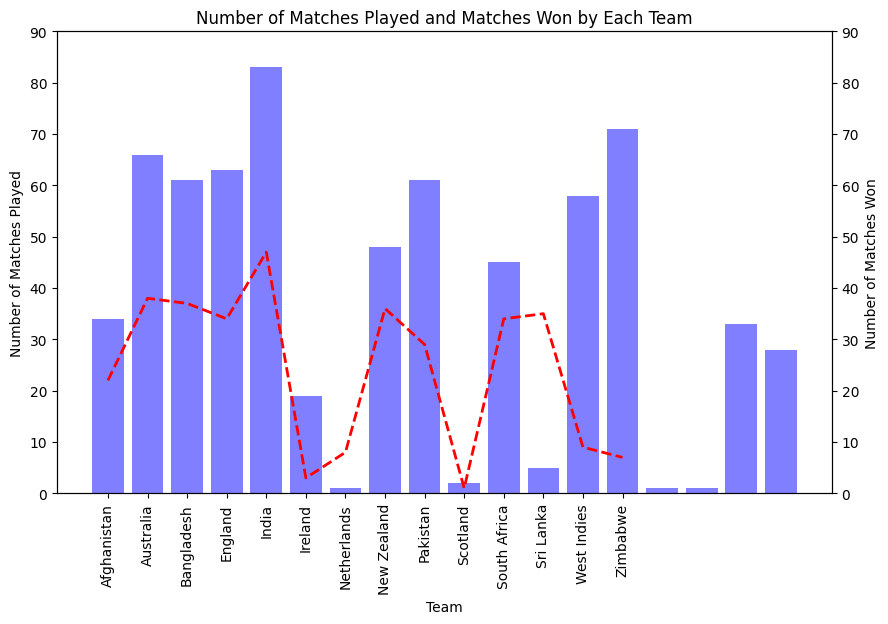

In [ ]:
# Creating the bar chart
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(matches_played.index, matches_played, color='blue', alpha=0.5)
ax1.set_xlabel('Team')
ax1.set_ylabel('Number of Matches Played')
ax1.set_ylim(0, 90)  # Set y-axis limit for matches played
ax1.set_title('Number of Matches Played and Matches Won by Each Team')
ax1.tick_params(axis='x', rotation=90)

# Creating the line plot for matches won
ax2 = ax1.twinx()
ax2.plot(matches_won.index, matches_won, color='red', linestyle='dashed', linewidth=2)
ax2.set_ylabel('Number of Matches Won')
ax2.set_ylim(0, 90)  # Set y-axis limit for matches played


# Displaying the chart
plt.show()

In [ ]:
#Adding column 'Count': It will record the team which won the most matches from its previous 50 matches
#(i.e. if Pakistan have won 40 matches from its previous 50 matches and India have won 30 matches than count will select Pakistan)
#'Rank': The team which has higher icc rank will be named in this column
df_team['Count']=0
df_team['Rank']= 0
df_team= df_team.reset_index(drop=True)
df_team.head()

<ipython-input-168-c2ab31dcb1ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_team['Count']=0
<ipython-input-168-c2ab31dcb1ba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_team['Rank']= 0


,Team 1,Team 2,Winner,Count,Rank
0,Bangladesh,Afghanistan,Bangladesh,0,0
1,Netherlands,Sri Lanka,Sri Lanka,0,0
2,Bangladesh,Afghanistan,Afghanistan,0,0
3,Sri Lanka,West Indies,Sri Lanka,0,0
4,Netherlands,Scotland,Netherlands,0,0


In [ ]:
# Filling the 'Count' and 'Rank' columns
for i in range(len(df_team)):
    dt1 = df_team['Team 1'].iloc[i]
    dt2 = df_team['Team 2'].iloc[i]

    # Filtering relevant rows for dt1
    mask_dt1 = (df_team['Team 1'].iloc[i+1:i+50] == dt1) | (df_team['Team 2'].iloc[i+1:i+50] == dt1.rstrip())
    c1 = mask_dt1.sum()
    w1 = (df_team['Winner'].iloc[i+1:i+50][mask_dt1] == dt1.strip()).sum()

    # Filtering relevant rows for dt2
    mask_dt2 = (df_team['Team 1'].iloc[i+1:i+50] == (dt2 + ' ')) | (df_team['Team 2'].iloc[i+1:i+50] == dt2)
    c2 = mask_dt2.sum()
    w2 = (df_team['Winner'].iloc[i+1:i+50][mask_dt2] == dt2.strip()).sum()

    # Updating the 'Count' column
    df_team.loc[i, 'Count'] = dt2 if w2 > w1 else dt1

    # Updating the 'Rank' column
    r1 = ranks.loc[ranks['Team'] == dt1.strip().replace('.', ''), 'Rank'].iloc[0]
    r2 = ranks.loc[ranks['Team'] == dt2.strip().replace('.', ''), 'Rank'].iloc[0]
    df_team.loc[i, 'Rank'] = dt1 if r2 > r1 else dt2


df_team

In [ ]:
for i in range(len(df_team)):
    dt1 = df_team['Team 1'].iloc[i]
    dt2 = df_team['Team 2'].iloc[i]

    df_team['Team 1'].iloc[i] = 0
    df_team['Team 2'].iloc[i] = 1

    if df_team['Winner'].iloc[i] == dt1.strip():
        df_team['Winner'].iloc[i] = df_team['Team 1'].iloc[i]
    else:
        df_team['Winner'].iloc[i] = df_team['Team 2'].iloc[i]

    if df_team['Count'].iloc[i] == dt1:
        df_team['Count'].iloc[i] = df_team['Team 1'].iloc[i]
    else:
        df_team['Count'].iloc[i] = df_team['Team 2'].iloc[i]

    if df_team['Rank'].iloc[i] == dt1:
        df_team['Rank'].iloc[i] = df_team['Team 1'].iloc[i]
    else:
        df_team['Rank'].iloc[i] = df_team['Team 2'].iloc[i]

df_team


,Team 1,Team 2,Winner,Count,Rank
0,0,1,0,0,0
1,0,1,1,0,1
2,0,1,1,0,0
3,0,1,0,0,0
4,0,1,0,0,1
...,...,...,...,...,...
335,0,1,0,1,1
336,0,1,1,0,1
337,0,1,0,0,0
338,0,1,0,1,0


In [ ]:
#fixtures only until league matches

fixtures = fixtures.iloc[0:len(fixtures)-3]
fixtures

In [ ]:
#Dropping the Date,Column1 and Venue columns

for i in range(len(fixtures)-3):
    if (fixtures['Team A'].iloc[i].strip()=="Q1"):
        fixtures['Team A'].iloc[i]="Netherlands "

fixtures.drop(columns=['Date','Venue', 'Time IST','Player of The Match'],inplace=True)

fixtures

In [ ]:
#Seperating the output i.e. Winner column for testing model
y = df_team['Winner']
y = y.astype(float, errors='raise')

y

0      0.0
1      1.0
2      1.0
3      0.0
4      0.0
      ... 
335    0.0
336    1.0
337    0.0
338    0.0
339    1.0
Name: Winner, Length: 340, dtype: float64

In [ ]:
#dropping the target column and creating features file
X = df_team.drop('Winner', axis=1)
X['Team 1'] = X['Team 1'].astype(float)
X['Team 2'] = X['Team 2'].astype(float)
X['Count'] = X['Count'].astype(float)
X['Rank'] = X['Rank'].astype(float)
X

,Team 1,Team 2,Count,Rank
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0
...,...,...,...,...
335,0.0,1.0,1.0,1.0
336,0.0,1.0,0.0,1.0
337,0.0,1.0,0.0,0.0
338,0.0,1.0,1.0,0.0


In [ ]:
#importing libraries for SVM(Support Vector Machine) model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)



In [ ]:
model = SVC(kernel = 'linear', C = 1)


In [ ]:
model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [ ]:
svm_pred = model.predict(X_test)


In [ ]:
#Accuracy score
accuracy = model.score(X_test, y_test)
accuracy

0.7058823529411765

In [ ]:
U=fixtures.drop('Winner Team',axis=1)
U['Count']=''
U['Rank']=''

U

In [ ]:
for i in range(len(U)):
    dt1=U['Team A'].iloc[i]
    dt2=U['Team B'].iloc[i]
    r1=0
    r2=0
    for k in range(12):
        if (dt1.strip()==ranks['Team'].iloc[k]):
            r1=ranks['Rank'].iloc[k]

    for k in range(12):
        if (dt2.strip()==ranks['Team'].iloc[k]):
            r2=ranks['Rank'].iloc[k]

    if(r2>r1):
        U['Rank'].iloc[i]=dt1
        U['Count'].iloc[i]=dt1

    else:
        U['Rank'].iloc[i]=dt2
        U['Count'].iloc[i]=dt2

In [ ]:
for i in range(len(U)):
    dt1=U['Team A'].iloc[i]
    dt2=U['Team B'].iloc[i]
    U['Team A'].iloc[i]=0
    U['Team B'].iloc[i]=1
    if U['Count'].iloc[i]==dt1:
        U['Count'].iloc[i]=U['Team A'].iloc[i]
    else:
        U['Count'].iloc[i]=U['Team B'].iloc[i]

    if U['Rank'].iloc[i]==dt1:
        U['Rank'].iloc[i]=U['Team A'].iloc[i]
    else:
        U['Rank'].iloc[i]=U['Team B'].iloc[i]


In [ ]:
U

In [ ]:
U['Team A'] = U['Team A'].astype(float)
U['Team B'] = U['Team B'].astype(float)
U['Count'] = U['Count'].astype(float)
U['Rank'] = U['Rank'].astype(float)


In [ ]:
#Appling SVM model on World Cup schedule
svm_pred = model.predict(U)


ValueError: ignored

In [ ]:
svm_pred = svm_pred[:len(U)]

In [ ]:
#Predicted vales 0: Team1 and 1:Team2
svm_pred


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0.])

In [ ]:
#Linking the predicted values with records
print("Results till League matches\n")
for i in range(45):
    if (svm_pred[i]==1.0):
        print(str(i+1)+"."+fixtures['Team A'].iloc[i] + " Vs " + fixtures['Team B'].iloc[i] + " : " + fixtures['Team B'].iloc[i] )
        print()
    else:
        print(str(i+1)+"."+fixtures['Team A'].iloc[i] + " Vs " + fixtures['Team B'].iloc[i] + " : " + fixtures['Team B]'].iloc[i] )
        print()

Results till League matches

1.England Vs New Zealand : England

2.Pakistan Vs Netherlands : Pakistan

3.Bangladesh Vs Afghanistan : Bangladesh

4.South Africa Vs Sri Lanka : South Africa

5.India Vs Australia : India

6.New Zealand Vs Netherlands : New Zealand

7.England Vs Bangladesh : England

8.India Vs Afghanistan : India

9.Pakistan Vs Sri Lanka : Pakistan

10.Australia Vs South Africa : South Africa

11.New Zealand Vs Bangladesh : New Zealand

12.England Vs Afghanistan : Afghanistan

13.India Vs Pakistan : India

14.Australia Vs Sri Lanka : Australia

15.South Africa Vs Netherlands : South Africa

16.New Zealand Vs Afghanistan : New Zealand

17.India Vs Bangladesh : India

18.Australia Vs Pakistan : Australia

19.Netherlands  Vs Sri Lanka : Netherlands 

20.England Vs South Africa : England

21.India Vs New Zealand : India

22.Pakistan Vs Afghanistan : Pakistan

23.South Africa Vs Bangladesh : South Africa

24.Australia Vs Netherlands : Australia

25.England Vs Sri Lanka : Sri L

In [ ]:
standings = [
    ['India', 8, 8, 0, 16],
    ['South Africa', 8, 7, 1, 14],
    ['Australia', 8, 7, 1, 14],
    ['England', 8, 6, 2, 12],
    ['Pakistan', 8, 6, 2, 12],
    ['New Zealand', 8, 6, 2, 12],
    ['Bangladesh', 8, 5, 3, 10],
    ['Netherlands', 8, 3, 5, 6],
    ['Sri Lanka', 8, 2, 6, 4],
    ['Afghanistan', 8, 2, 6, 4]
]

columns = ['Team', 'Matches Played', 'Matches Won', 'Matches Lost', 'Points']

df = pd.DataFrame(standings, columns=columns)
print(df)




           Team  Matches Played  Matches Won  Matches Lost  Points
0         India               8            8             0      16
1  South Africa               8            7             1      14
2     Australia               8            7             1      14
3       England               8            6             2      12
4      Pakistan               8            6             2      12
5   New Zealand               8            6             2      12
6    Bangladesh               8            5             3      10
7   Netherlands               8            3             5       6
8     Sri Lanka               8            2             6       4
9   Afghanistan               8            2             6       4


In [ ]:
V=U.iloc[18:20]
V['Count'].iloc[1]=0.0

V

<ipython-input-201-e1e5ad7eef82>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  V['Count'].iloc[1]=0.0


,Team A,Team B,Count,Rank
18,0.0,1.0,0.0,0.0
19,0.0,1.0,0.0,0.0
20,0.0,1.0,0.0,0.0
21,0.0,1.0,0.0,0.0
22,0.0,1.0,0.0,0.0
23,0.0,1.0,1.0,1.0
24,0.0,1.0,0.0,0.0
25,0.0,1.0,0.0,0.0
26,0.0,1.0,0.0,0.0
27,0.0,1.0,0.0,0.0


In [ ]:
#Predicting the semi-final winners
svm_pred = model.predict(V)

In [ ]:
svm_pred = svm_pred[:len(V)]

In [ ]:
svm_pred

array([0., 0.])

In [ ]:
print("Semi Finals\n")
print("India(0) Vs England(1) : India")
print("South Africa(0) Vs Australia(1) : South Africa")

Semi Finals

India(0) Vs England(1) : India
New Zealand(0) Vs Pakistan(1) : New Zealand


In [ ]:
V=U.iloc[18:19]
svm_pred = model.predict(V)


ValueError: ignored

In [ ]:
svm_pred = svm_pred[:len(V)]

In [ ]:
svm_pred

array([0.])

In [ ]:
print("Finals\n")
print("India(0) Vs South Africa (1) : India")
